In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [4]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'

'''
Fields
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
          2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
          3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
          4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals
'''

'\nFields\ndatetime - hourly date + timestamp  \nseason -  1 = spring, 2 = summer, 3 = fall, 4 = winter \nholiday - whether the day is considered a holiday\nworkingday - whether the day is neither a weekend nor holiday\nweather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy \n          2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist \n          3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds \n          4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog \ntemp - temperature in Celsius\natemp - "feels like" temperature in Celsius\nhumidity - relative humidity\nwindspeed - wind speed\ncasual - number of non-registered user rentals initiated\nregistered - number of registered user rentals initiated\ncount - number of total rentals\n'

In [5]:
bikes.shape

(10886, 11)

In [6]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
# "count" is a method, so it's best to name that column something else
bikes.rename(columns={'count': 'total'}, inplace=True)

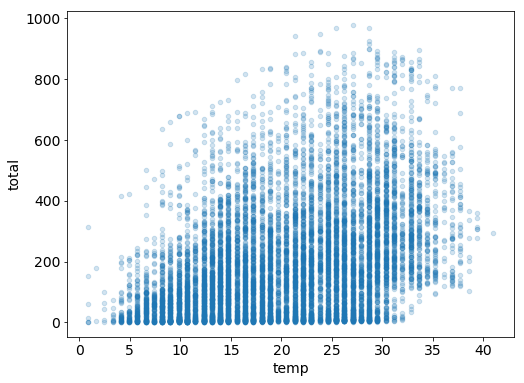

In [9]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

# Pandas scatter plot
bikes.plot(kind='scatter', x='temp', y='total', alpha=0.2)

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


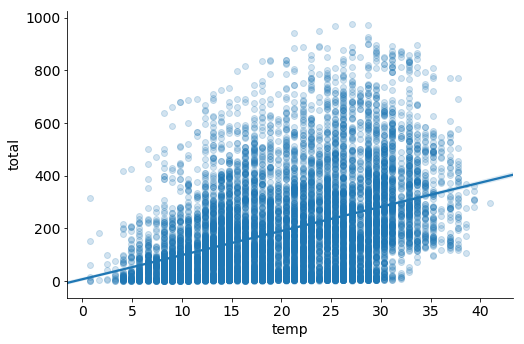

In [10]:
# Seaborn scatter plot with regression line
sns.lmplot(x='temp', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

In [11]:
# create X and y
feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes.total

In [12]:
# instantiate, fit
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

6.046212959616781
[9.17054048]


In [11]:
# Interpreting the intercept (β0):

# It is the value of y when x=0.
# Thus, it is the estimated number of rentals when the temperature is 0 degrees Celsius.
# Note: It does not always make sense to interpret the intercept. (Why?)

# Interpreting the "temp" coefficient (β1):

# It is the change in y divided by change in x, or the "slope".
# Thus, a temperature increase of 1 degree Celsius is associated with a rental increase 
# of 9.17 bikes.

# This is not a statement of causation.
# β1 would be negative if an increase in temperature was associated with a decrease in rentals.

In [12]:
# Using the model for prediction
# How many bike rentals would we predict if the temperature was 25 degrees Celsius?

In [17]:
# manually calculate the prediction
linreg.intercept_ + linreg.coef_*25

array([235.309725])

In [20]:
# use the predict method
linreg.predict([[25]])

array([235.309725])

In [21]:
# Visualizing the data (part 2)
# explore more features
feature_cols = ['temp', 'season', 'weather', 'humidity']

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


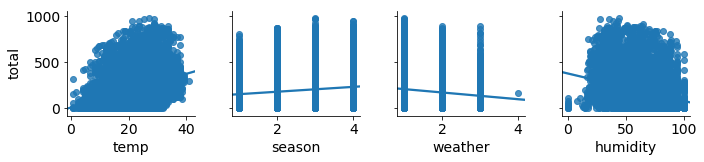

In [22]:
# multiple scatter plots in Seaborn
sns.pairplot(bikes, x_vars=feature_cols, y_vars='total', kind='reg')